# Registros de acidentes com óbitos em São Paulo entre 2015 e 2020
### Fonte: http://www.respeitoavida.sp.gov.br/relatorios/

In [1]:
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt

/home/valer/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Pegando os dados da requisição, armazenando e salvando em um dataframe lido com Pandas
url = 'https://raw.githubusercontent.com/mlvaler/sp_car_accident/master/accident_sp.csv?token=APWZHBH4R4EZL44UFG7LMGC62F47M'
cont = requests.get(url).content
df = pd.read_csv(io.StringIO(cont.decode('utf-8')))
df.shape

(30571, 34)

## Formato do dataframe: 30.571 registros e 34 colunas
---

In [3]:
df.columns

Index(['Id da Delegacia (RDO)', 'Número do Bo (RDO)', 'Ano do BO (RDO)',
       'Data do Óbito', 'Data do Acidente', 'Tipo de via', 'Dia do óbito',
       'Mês do Óbito', 'Mês Óbito Descrição', 'Ano do Óbito',
       'Ano/Mês do Óbito', 'Dia da Semana', 'Hora do Acidente', 'Turno',
       'Município', 'Região Administrativa', 'Logradouro', 'Númeral / KM',
       'Jurisdição', 'Administração', 'Conservação',
       'Tipo do local da ocorrência', 'LAT_(GEO)', 'LONG_(GEO)',
       'Tipo do veículo da vítima', 'Tipo de vítima', 'Local do óbito',
       'Tipo de acidente', 'Sub Tipo do Acidente',
       'Tempo entre o Acidente e o óbito', 'Sexo', 'Faixa etária',
       'Idade da vítima', 'Outro Veículo Envolvido'],
      dtype='object')

## Alterando os nomes das colunas de interesse para manipular os dados de maneira mais simples:

In [4]:
columns = {
    'Data do Acidente': 'data_acidente',
    'Mês do Óbito': 'mes_obito',
    'Tipo de via': 'tipo_via',
    'Turno': 'turno',
    'Município': 'municipio',
    'Logradouro': 'logradouro',
    'LAT_(GEO)': 'lat',
    'LONG_(GEO)': 'lon',
    'Tipo do veículo da vítima': 'tipo_veiculo',
    'Tipo de vítima': 'tipo_vitima',
    'Tipo do acidente': 'tipo_acidente',
    'Tempo entre o Acidente e o Óbito': 'tempo_acidente_obito',
    'Sexo': 'sexo',
    'Idade da vítima': 'idade',
    'Outro Veículo Envolvido': 'outro_veiculo_envolvido',
    'Faixa etária': 'faixa_etaria'
}

df = df.rename(columns,axis=1)

df.head()

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,data_acidente,tipo_via,Dia do óbito,mes_obito,Mês Óbito Descrição,Ano do Óbito,...,tipo_veiculo,tipo_vitima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Tempo entre o Acidente e o óbito,sexo,faixa_etaria,idade,outro_veiculo_envolvido
0,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,CONDUTOR,VIA,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,45-49,48.0,ONIBUS
1,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,ONIBUS,PASSAGEIRO,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,35-39,36.0,ONIBUS
2,110429,3887,2020,2020-04-30,2020-04-17,Rodovias,30,4,ABRIL,2020,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,CHOQUE,DEFENSA / BARREIRA,Até 30 dias,MASCULINO,25-29,26.0,NÃO HÁ
3,30309,1745,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,Mesmo dia,MASCULINO,NAO DISPONIVEL,NaN,AUTOMOVEL
4,70923,1373,2020,2020-04-30,2020-04-30,Vias Municipais,30,4,ABRIL,2020,...,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,Mesmo dia,FEMININO,30-34,30.0,NÃO HÁ


----

# Análise exploratória
* Meses com maior número de vítimas?
* Qual a faixa etária com maior volume de óbitos?
* Dos óbitos, quais eram os veículos envolvidos?
* Quais regiões mais registraram acidentes?

----
## Mês com maior número de vítimas?

<AxesSubplot:>

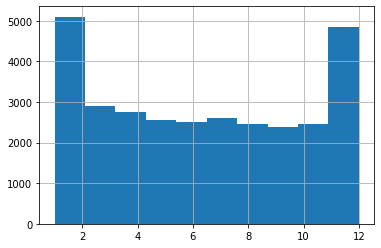

In [5]:
df.mes_obito.hist()

----
## Qual veículo teve mais registros?

/home/valer/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'MOTOCICLETA'),
  Text(1, 0, 'PEDESTRE'),
  Text(2, 0, 'AUTOMOVEL'),
  Text(3, 0, 'BICICLETA'),
  Text(4, 0, 'NAO DISPONIVEL'),
  Text(5, 0, 'CAMINHAO'),
  Text(6, 0, 'ONIBUS'),
  Text(7, 0, 'OUTROS')])

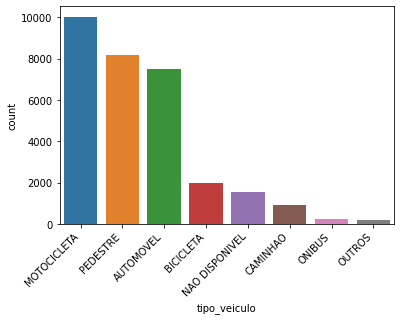

In [6]:
sns.countplot(df.tipo_veiculo, order = df['tipo_veiculo'].value_counts().index)
plt.xticks(rotation=45, horizontalalignment ='right')

----
## Qual a faixa etária com maior volume de óbitos?

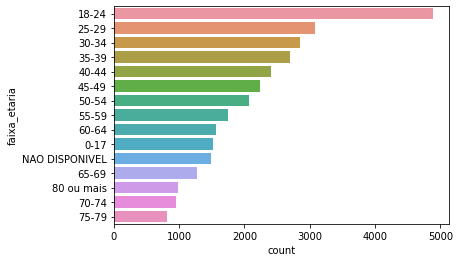

In [7]:
sns.countplot(y = 'faixa_etaria',
              data = df,
              order = df['faixa_etaria'].value_counts().index)
plt.show()

----
## Qual via registra mais acidentes?

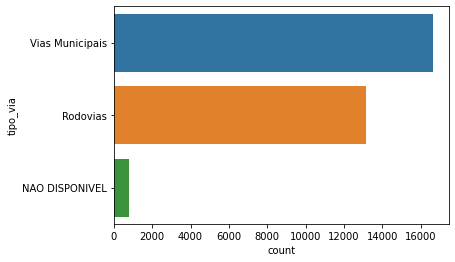

In [8]:
sns.countplot(y = 'tipo_via',
              data = df,
              order = df['tipo_via'].value_counts().index)
plt.show()

----
## Qual o principal período dos óbitos?

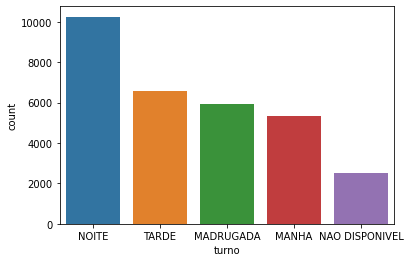

In [11]:
sns.countplot(x = 'turno',
              data = df,
              order = df['turno'].value_counts().index)
plt.show()

----
## Regiões com maior registro de óbitos:

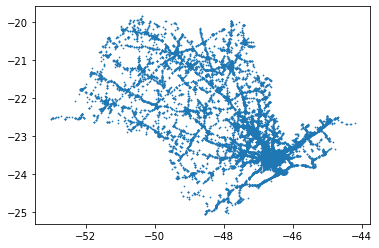

In [14]:
plt.scatter(df.lon,df.lat,s=0.5)

# Conclusão

Os dados nos mostram que a maioria dos óbitos no estado de SP envolvem:
* Jovens entre 18 e 24 anos;
* Em motocicletas;
* Em vias municipais;
* No período da noite;
* Com o dobro de casos nos meses de janeiro e dezembro.